Lets perform Sentiment Analysis. 
------------------------------------------------------------------------------------------
Polarity analysis takes into account the amount of positive or negative terms that appear in a given sentence. It is useful to some extent, since it does a good job of structuring data sets


Source: https://www.kaggle.com/datasets/datasnaek/youtube?select=UScomments.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
comments = pd.read_csv(r'C:\Users\Lenovo\Desktop\Data analysis\youtube Case study\UScomments.csv', error_bad_lines = False)

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3186: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
comments.head()


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [4]:
#  checking null values 
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [5]:
# dropping missing values
comments.dropna(inplace=True)

In [6]:
# install textblob package
%pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [7]:
from textblob import TextBlob

In [8]:
# sample sentiment check()
TextBlob("Testing").sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [9]:
sample_data = comments[0:10000]

In [10]:
# test all comments; testing user sentiment
polarity=[]
for comment in comments['comment_text']:
    try:
         polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)


In [11]:
polarity[0:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573]

In [12]:
comments['polarity'] = polarity

In [13]:
comments.head(10)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [14]:
# check positive comments
comments_positive = comments[comments['polarity'] == 1]

In [15]:
# check negative comments
comments_negative = comments[comments['polarity'] == -1]

In [16]:
comments_negative.head(2)

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0


#Analysis 2: WordCloud of positive and negative comments..
----------------------------------------------------------------
 Word cloud is a technique for visualising frequent words in a text where the size of the words represents their frequency.

In [17]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: kiwisolver>=1.0.1 in c:\users\lenovo\anaconda3\lib\site-packages (from matplotlib->wordcloud) (1.1.0)



In [19]:
from wordcloud import WordCloud, STOPWORDS 

In [20]:
# view negative comments
comments_negative['comment_text']

512       BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562       Well… The brain surgeon Ben Carson just proved...
952              WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                         WTF BRUH!!!!!!
1391                        cheeseus christ thats insane!!!
                                ...                        
690788                                  Like Kelly she evil
690865                       R U FUCKING KIDDING ME?!?!?!?!
691073             This is horribly offensive please report
691180    Sink holes looks terrifying sinkholes sink you...
691224    Trump talked to the president of US Virgin Isl...
Name: comment_text, Length: 3508, dtype: object

In [27]:
# joining all rows in one 
total_negative_comments = ' '.join(comments_negative['comment_text'])
total_positive_comments = ' '.join(comments_positive['comment_text'])

In [ ]:
# view first 100 words
total_negative_comments[0:100]

What is STOPWORD?
------------------------------------------------------------------------------------------------
Stop words are a set of commonly used words in any language. For example, in English, “the”, “is” and “and”, would easily qualify as stop words. In NLP and text mining applications, stop words are used to eliminate unimportant words, allowing applications to focus on the important words instead.

(-0.5, 399.5, 199.5, -0.5)

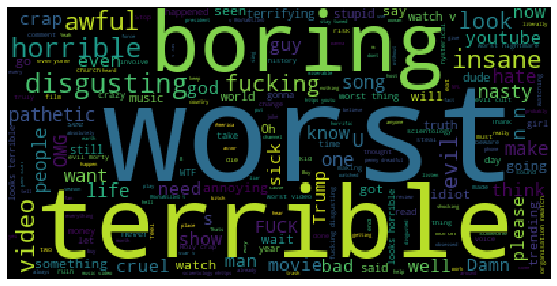

In [26]:
# passing to wordcloud to check all NEGATIVE WORDS
wordcloud = WordCloud(stopwords = set(STOPWORDS)).generate(total_negative_comments)
# customizing figure size 
plt.figure(figsize=(20,5))
# showcase wordcloud
plt.imshow(wordcloud)
# disable axis labels
plt.axis('off')


(-0.5, 399.5, 199.5, -0.5)

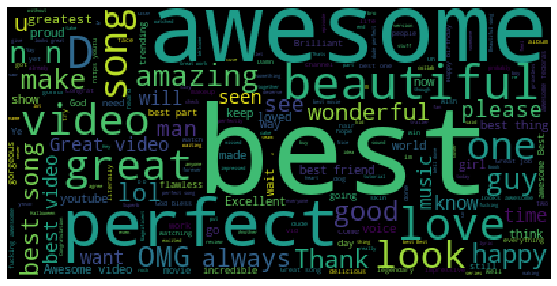

In [29]:
wordcloud = WordCloud(stopwords = set(STOPWORDS)).generate(total_positive_comments)
plt.figure(figsize =(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Analysis 3: Emoji Analysis
----------------------------------------------------------------

In [30]:
%pip install emoji

     -------------------------------------- 175.4/175.4 KB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171035 sha256=9c29164f8c3fd850a3d1ff8f15cc553a917535e615b413f87106de3df2f4a9a3
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\8a\4e\b6\57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji



In [32]:
import emoji

In [33]:
# filtering emoji from comments and storing
emoji_list=[]
for comment in comments['comment_text']:
    for char in comment:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 'emoji.UNICODE_EMOJI_ENGLISH' is deprecated and will be removed in version 2.0.0. Use 'emoji.EMOJI_DATA' instead.
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  """
